<h1>Finding Trends in Police Homicides and Crime Rates in US Cities and States from 2013-2016</h1>

<h4>Benjamin Hoover - October 25, 2016</h4>


This lab uses crime data from 2013-<b>2015</b>, including police homicides, in the top 100 cities for violent crime. It also uses a database of all the police homicides from 2013-<b>2016</b>, as well as statewide population data from 2015. This data will be used to answer the following questions:

1. Does a higher rate of violent crime make it more likely for police to kill people? (using city data)
2. Does a larger black population by percentage make it more likely for police to kill black people? (using city data)
3. In which state are you most likely to be killed by police if you are of any race? 
4. In which state are you most likely to be killed by police if you are black?
5. Does a larger black population by percentage make it more likely for police to kill black people? (using state data)
6. Does a higher proportion of black population correlate to a higher violent crime rate? (using city data)
7. In which cities is the police homicide rate significantly higher/lower than the statewide police homicide rate?

In [105]:
import statistics
import matplotlib.pyplot as plt
import scipy.stats as sp
import pandas
% matplotlib inline

<h1>Section A</h1>
Does a higher rate of violent crime make it more likely for police to kill people?  Does a larger black population by percentage make it more likely for police to kill black people?  Use correlation coefficients to make your argument.

In [106]:
#read files
file = open("PoliceViolence_city.csv", "r", errors="ignore")
cities = []
#put stuff in cities
for i in file:
    cities.append(i)
del cities[0]

#get rows
blackPopProportion = []
blackPoliceHomicideRate = []
violentCrimeRate = []
policeHomicideRate = []

for j in range(len(cities)):
    #get violent crime rate by row
    violentCrimeRate.append(float(cities[j].split(",")[18]))
    policeHomicideRate.append(float(cities[j].split(",")[20]))
    blackPopProportion.append(float(cities[j].split(",")[6])/float(cities[j].split(",")[5]) * 100)
    blackPoliceHomicideRate.append(float(cities[j].split(",")[21]))

<h3>Part 1</h3>

Does a higher rate of violent crime make it more likely for police to kill people? (In the top 100 cities for violent crime)

R Value: 0.216269790548
R Squared: 0.0467726223036
y = 0.663046061309x + 17.1192534847


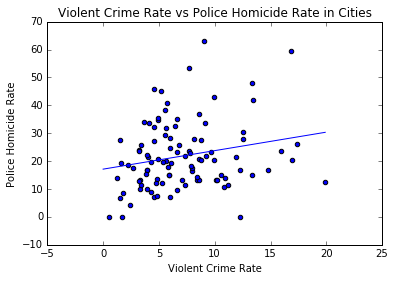

In [107]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(violentCrimeRate, policeHomicideRate)
plt.scatter(violentCrimeRate, policeHomicideRate)
plt.plot([0, max(violentCrimeRate)],[intercept, max(violentCrimeRate) * slope + intercept])
plt.xlabel("Violent Crime Rate")
plt.ylabel("Police Homicide Rate")
plt.title("Violent Crime Rate vs Police Homicide Rate in Cities")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

There is a weak, positive correlation between violent crime rate and police homicide rate. As seen in the graph, it is marginally more likely for there to be a higher police homicide rate when the violent crime rate is higher. However, the r value is only 0.2, so again, the correlation is fairly weak. In addition, the r squared value is only 0.04, meaning the model only accounts for 4% of the variance, so the model is not good for making any sort of precise prediction.

<h3>Part 2</h3>
Does a larger black population by percentage make it more likely for police to kill black people? (In the top 100 cities for violent crime)

R Value: -0.263231250181
R Squared: 0.0692906910719
y = -0.943508945963x + 74.3967859232


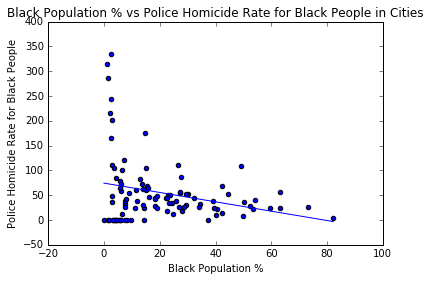

In [108]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(blackPopProportion, blackPoliceHomicideRate)
plt.scatter(blackPopProportion, blackPoliceHomicideRate)
plt.plot([0, max(blackPopProportion)],[intercept, max(blackPopProportion) * slope + intercept])
plt.xlabel("Black Population %")
plt.ylabel("Police Homicide Rate for Black People")
plt.title("Black Population % vs Police Homicide Rate for Black People in Cities")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

There is a weak, negative correlation between violent crime rate and police homicide rate. As seen in the graph, it is marginally more likely for there to be a lower police homicide rate for black people when there is a greater percentage of black people in the city. However, the r value is still really low, only -0.26, so while it is a slightly stronger correlation than violent crime rate vs police homicide rate, it is still fairly weak. In addition, the r squared value is only 0.06, meaning the model only accounts for 6% of the variance, so the model is also not good for making any sort of precise prediction.

<h1>Section B</h1>
In which state are you most likely to be killed by police if you are of any race?  In which state are you most likely to be killed by police if you are black?

<h3>Part 1</h3>
In which state are you most likely to be killed by police if you are of any race?

In [109]:
#read files
file = open("KilledByPolice.csv", "r", errors="ignore")
file2 = open("states.csv", "r", errors="ignore")
killedList = []
stateList = []
#put stuff in killedList
for i in file:
    killedList.append(i)
del killedList[0]
for i in file2:
    stateList.append(i)

#go get the populations of each states and put it in a dictionary
statePopList = {}
for state in stateList:
    statePopList[state.split(",")[1]] = int(state.split(",")[2])
    
#go tally up the number of people killed in each state
stateDict = {}

for j in range(len(killedList)):
    
    stateName = killedList[j].split(",")[5].rstrip()
    #in the dictionary, for each state have an array where [all people killed, total population]
    if stateName in stateDict:
        stateDict[stateName][0] += 1
    else:
        stateDict[stateName] = [1, statePopList[stateName]]
        
#convert to percent
for stateName in stateDict.keys():
    stateDict[stateName] = stateDict[stateName][0]/stateDict[stateName][1] * 1000000




#http://stackoverflow.com/questions/613183/sort-a-python-dictionary-by-value
newStateDict = sorted(stateDict.items(), key=lambda x: x[1], reverse=True)

sortedStates = []
sortedPercents = []

for state in newStateDict:
    sortedStates.append(state[0])
    sortedPercents.append(state[1])  
name = {"Police Homicides Per 1,000,000 People":sortedPercents}
print(pandas.DataFrame(name, index=sortedStates))

    Police Homicides Per 1,000,000 People
NM                              36.448934
DC                              29.751810
OK                              27.356368
AZ                              26.361788
WY                              23.886423
AK                              23.021754
MT                              22.266346
NV                              22.138856
WV                              20.605945
LA                              18.840762
CA                              18.291055
CO                              17.959987
AL                              17.493387
FL                              17.167152
MO                              16.437441
OR                              16.133128
MS                              15.706808
SD                              15.143238
WA                              14.922561
KS                              14.768304
SC                              14.705444
MD                              14.318058
NE                              14

As visible in the table, New Mexico had the highest rate of police homicides, at 36.45 per 1,000,000 people. Therefore, you are most likely to be killed by police in New Mexico. You are least likely to be killed by police in Rhode Island, which had just 4.733 police homicides per 1,000,000 people.

<h3>Part 2</h3>

In which state are you most likely to be killed by police if you are black?

In [110]:
#go tally up the number of black people killed in each state
stateDict = {}
for j in range(len(killedList)):
    
    stateName = killedList[j].split(",")[5].rstrip()
    race = killedList[j].split(",")[3].rstrip()
    #in the dictionary, for each state have an array where [all people killed, total population]
    if stateName in stateDict and race == "Black":
        stateDict[stateName][0] += 1
    elif race == "Black":
        stateDict[stateName] = [1, statePopList[stateName]]
        
#convert to percent
for stateName in stateDict.keys():
    stateDict[stateName] = stateDict[stateName][0]/stateDict[stateName][1] * 1000000
#http://stackoverflow.com/questions/613183/sort-a-python-dictionary-by-value
stateDict = sorted(stateDict.items(), key=lambda x: x[1], reverse=True)

#go get the % black of each states and put it in a dictionary
statePopList = {}
for state in stateList:
    statePopList[state.split(",")[1]] = state.split(",")[4]

sortedCities = []
sortedRates = []
sortedPercent = []
#not a dict anymore
for item in stateDict:
    sortedCities.append(item[0])
    sortedRates.append(item[1])
    sortedPercent.append(statePopList[item[0]].replace("\n",""))

name = {"Black People Killed by Police Per 1,000,000 Black People":sortedRates, "Percent Black":sortedPercent}
print(pandas.DataFrame(name, index=sortedCities))
sortedPercent = []

    Black People Killed by Police Per 1,000,000 Black People Percent Black
DC                                          28.264220               50.07%
LA                                           9.420381               32.40%
MD                                           9.323387               30.10%
OK                                           8.948345                7.96%
AL                                           7.408964               26.38%
MO                                           6.739351               11.49%
MS                                           6.683748               37.30%
FL                                           6.166362               15.91%
NC                                           5.078264               21.60%
GA                                           4.992726               31.40%
SC                                           4.901815               28.48%
OH                                           4.477577               12.04%
IL                       

If you are black, you are most likely to be killed by police in Washington DC, since it had the greatest number of black people killed per 1,000,000 black people. You are least likely to be killed by police in Hawaii, which had the lowest number of black people killed by police at 0.699 per 1,000,000 black people.

This was derived by dividing the total black people killed by police by the number of black people in the state times 1,000,000. Runners up include Lousiana, Maryland, Oklahoma,and Alabama.

Earlier, we determined that in the top 100 cities with the most violent crime, as the percent of the black population increased, the police homicide rate for black people was lower. Interestingly, the opposite appears to be true here. The states at the top of the list, with the highest rate of police homicide for black people, tend to have a much higher proportion of black people than the states at the bottom of the list. We can use a regression analysis to verify that this is in fact true.

<h3>Part 3</h3>

Does a larger black population by percentage make it more likely for police to kill black people? (using state data)

R Value: 0.773574978968
R Squared: 0.598418248086
y = 0.31061331506x + 0.0139032856088


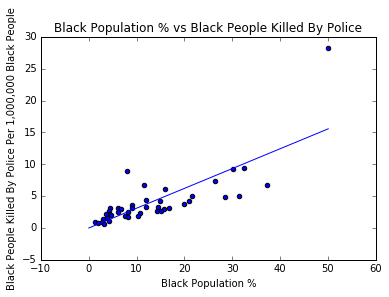

In [111]:
sortedPercent = []
for item in stateDict:
    percent = statePopList[item[0]].replace("\n","")
    sortedPercent.append(float(percent.replace("%","")))

slope, intercept, rvalue, pvalue, stderr = sp.linregress(sortedPercent, sortedRates)
plt.scatter(sortedPercent, sortedRates)
plt.plot([0, max(sortedPercent)],[intercept, max(sortedPercent) * slope + intercept])
plt.xlabel("Black Population %")
plt.ylabel("Black People Killed By Police Per 1,000,000 Black People")
plt.title("Black Population % vs Black People Killed By Police")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

This observation is proven true via the regression plot. As shown, in states with a greater black population, there was also a greater number of police homicides on black people per 1,000,000 black people. Once again, this differs from the conclusion we found earlier in part 1 using city data, which that the police homicide rate for black people was lower when there was a greater proportion of black people living in the city. In addition, this correlation (0.77) is much stronger than the one in part 1 (-0.26). It also has a much higher r squared value, meaning the model is more representative of the data as a whole.

Washington DC is indicated by the highest point in the upper right and shows that it has significantly more black people killed by police than the model would indicate.

Note that since this model uses state data, it includes 2016 police homicides, which the city data does not. This may have had an impact on this model, however, it seems unlikely that a single year could have turned a negative correlation into a positive correlation.

<h1>Section C</h1>
Does a higher proportion of black population correlate to a higher violent crime rate? In which cities (out of the top 100 for violent crime) is the police homicide rate higher than its state's?

<h3>Part 1</h3>

Does a higher proportion of black population correlate to a higher violent crime rate?

R Value: 0.717372282014
R Squared: 0.514622991002
y = 0.156860076939x + 3.83593152073


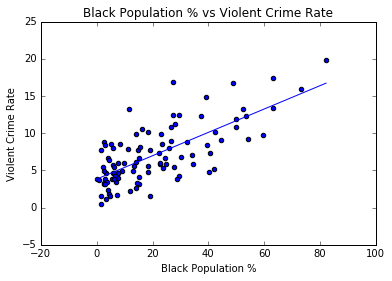

In [112]:
#already have blackPopProportion, violentCrimeRate from Part 1. Simply Resuse the Same Data
slope, intercept, rvalue, pvalue, stderr = sp.linregress(blackPopProportion, violentCrimeRate)
plt.scatter(blackPopProportion, violentCrimeRate)
plt.plot([0, max(blackPopProportion)],[intercept, max(blackPopProportion) * slope + intercept])
plt.xlabel("Black Population %")
plt.ylabel("Violent Crime Rate")
plt.title("Black Population % vs Violent Crime Rate")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

As visible by the scatter plot, as well as the correlation coefficient of 0.717, there is a pretty strong positive correlation between black population and violent crime rate. Unlike the other correlations, the r squared value is over 0.5, meaning that the model accounts for over 50% of the variance, making it slightly better for predictive interpolation. This does not mean that more black people cause more violent crime, it simply means that there is a higher crime rate in cities with a greater black population, which could be due to many different factors.

<h3>Part 2</h3>

In which cities (out of the top 100 for violent crime) is the police homicide rate higher than its state's?

<b>The state data cannot be directly compared yet with the city data, since the city data only includes police homicides from 2013-2015, while the state data includes data from 2013-2016. We need to factor out this extra year of data.</b>

In [114]:
#go get the populations of each states and put it in a dictionary
statePopList = {}
for state in stateList:
    statePopList[state.split(",")[1]] = int(state.split(",")[2])
    
#get state police homicides per capita, excluding 2016
stateDict = {}

for j in range(len(killedList)):
    
    stateName = killedList[j].split(",")[5].rstrip()
    #in the dictionary, for each state have an array where [all people killed, total population]
    year = killedList[j].split(",")[4].split("/")[2]
    if stateName in stateDict and year != "16":
        stateDict[stateName][0] += 1
    elif year != "16":
        stateDict[stateName] = [1, statePopList[stateName]]
        
#convert to percent
for stateName in stateDict.keys():
    stateDict[stateName] = stateDict[stateName][0]/stateDict[stateName][1]


#fetch the city's homicide rates
cityRates = {}
#read files
file = open("PoliceViolence_city.csv", "r", errors="ignore")
cities = []
#put stuff in cities
for i in file:
    cities.append(i)
del cities[0]


#police violence_city csv uses full state names. need to convert to state code
stateNames = {}
stateList = []
file2 = open("states.csv", "r", errors="ignore")
for i in file2:
    stateList.append(i)

for state in stateList:
    #need to remove superflous .
    stateNames[state.split(",")[0][1:]] = state.split(",")[1]
#got the state codes
policeHomicideRate = []

#city rates formats: Dictionary where key is state. Object is list of cities and their rates.
#note fixed row 60 state: "Minneapolis" 
for city in cities:

    #convert state name to state code
    stateName = stateNames[city.split(",")[0]]
    cityName = city.split(",")[1] + ", " + stateName
    poHomicideRate = float(city.split(",")[3])/float(city.split(",")[5])
    stateHomicideRate = stateDict[stateName]
    cityMultiplier = poHomicideRate/stateHomicideRate
    cityRates[cityName] = cityMultiplier
#http://stackoverflow.com/questions/613183/sort-a-python-dictionary-by-value
cityRates = sorted(cityRates.items(), key=lambda x: x[1], reverse=True)

sortedCitiesAbove2 = []
sortedRatesAbove2 = []
sortedCitiesAbove1 = []
sortedRatesAbove1 = []
sortedCitiesBelow = []
sortedRatesBelow = []
for arr in cityRates:
    if arr[1] > 2.0:
        sortedCitiesAbove2.append(arr[0])
        sortedRatesAbove2.append(arr[1])
    elif arr[1] > 1.0:
        sortedCitiesAbove1.append(arr[0])
        sortedRatesAbove1.append(arr[1])
    else:
        sortedCitiesBelow.append(arr[0])
        sortedRatesBelow.append(arr[1])

name1 = {"City's Police Homicide Rate is ___ x Its State's Police Homicide Rate":sortedRatesAbove2}
name2 = {"City's Police Homicide Rate is ___ x Its State's Police Homicide Rate":sortedRatesAbove1}
name3 = {"City's Police Homicide Rate is ___ x Its State's Police Homicide Rate":sortedRatesBelow}
print(pandas.DataFrame(name1, index=sortedCitiesAbove2))
print()
print(pandas.DataFrame(name2, index=sortedCitiesAbove1))
print()
print(pandas.DataFrame(name3, index=sortedCitiesBelow))
print()


                          City's Police Homicide Rate is ___ x Its State's Police Homicide Rate
Norfolk, VA                                                        7.446764                    
St. Paul, MN                                                       4.937728                    
St. Louis, MO                                                      4.414838                    
Orlando, FL                                                        4.384855                    
Madison, WI                                                        4.124581                    
Cincinnati, OH                                                     3.990810                    
Baltimore, MD                                                      3.492938                    
Columbus, OH                                                       3.463132                    
Indianapolis, IN                                                   3.255671                    
Stockton, CA                            

As visible in the table, the city of Norfolk, Virginia has the largest difference in police homicide rate compared to the state of Virginia, with a police homicide rate 7.45x higher than the state's, followed by St. Paul, MN and St. Louis, MO. The cities with the lowest police homicide rates relative to its state were Irvine, CA; Buffalo, NY; and Plano, TX; which all had no police homicides from 2013-2015. In cities that did have police homicides from 2013-2015, Chula Vista, CA had the lowest compared to its state at 0.27x the state's police homicide rate.

An interesting trend is that the vast majority of the top 100 cities for violent crime had a higher police homicide rate than their respective state. This could be due to the fact that violent crime tends to be concentrated inside cities, and as we saw earlier, higher violent crime is correlated to an increased rate of police homicide, resulting in large cities having higher police homicide rates than the state overall.

It should be noted that the city population data and the state population data are not from the same sources, so the difference in the state vs city rates may not be completely accurate. This might explain how come Washington, DC, which is the only city in the District of Columbia, had 0.91x the District of Columbia's police homicide rate.